## Observations and Insights 

Observation #1: \
    Each drug regimen has 10 mouses (except Propriva and Stelasyn have 9). The distribution between Male and Female mouses are almost equal. The data size is not big is a limitation.\
<br/>Observation #2:\
    A mouse (ID S185) tumor size data in Capomulin regimen shows that the drug has effect on reducing the tumor size over times. However, we need to see other mouse data in Capomulin regimen as well to conclude if the drug has effect (plot all mouse data in Capomulin regimen in the same plot or plot box plot of beginning tumor size together with final tumor size in the same plot)\
<br/>Observation #3:\
    There is a positive correlation between mice weight and the average tumor size. The heavier the mice, the bigger the tumor size.\
<br/>Observation #4:\
    Capomulin and Ramicane are the 2 Drug regimens that shows better results as the final tumor size has been reduced more than other drug regimens. However we need to futher investigate whether the final tumor size is low for Capomulin and Ramicane is due to the drug effect or because the mice weight is low in these 2 treatments which can cause bias.

In [244]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset
mouse_study_df = pd.merge(mouse_metadata,study_results,on="Mouse ID",how="inner")
# Display the data table for preview
mouse_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [245]:
# Checking the number of mice.
mouse_study_df["Mouse ID"].nunique()


249

In [246]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_id = mouse_study_df[mouse_study_df.duplicated(subset=["Mouse ID","Timepoint"],keep=False)]["Mouse ID"].unique()
duplicate_mouse_id


array(['g989'], dtype=object)

In [247]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = mouse_study_df[mouse_study_df["Mouse ID"].isin(duplicate_mouse_id)]
duplicate_mouse_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [248]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_study_df = mouse_study_df[~mouse_study_df["Mouse ID"].isin(duplicate_mouse_id)]
clean_mouse_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [249]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_study_df["Mouse ID"].nunique()

248

## Summary Statistics

In [250]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_list = clean_mouse_study_df["Drug Regimen"].unique()
mean_regimen = [clean_mouse_study_df.loc[clean_mouse_study_df["Drug Regimen"]==x,:]["Tumor Volume (mm3)"].mean() for x in regimen_list  ]
median_regimen = [clean_mouse_study_df.loc[clean_mouse_study_df["Drug Regimen"]==x,:]["Tumor Volume (mm3)"].median() for x in regimen_list  ]
var_regimen = [clean_mouse_study_df.loc[clean_mouse_study_df["Drug Regimen"]==x,:]["Tumor Volume (mm3)"].var() for x in regimen_list  ]
std_regimen = [clean_mouse_study_df.loc[clean_mouse_study_df["Drug Regimen"]==x,:]["Tumor Volume (mm3)"].std() for x in regimen_list  ]
SEM_regimen = [clean_mouse_study_df.loc[clean_mouse_study_df["Drug Regimen"]==x,:]["Tumor Volume (mm3)"].sem() for x in regimen_list  ]

# This method is the most straighforward, creating multiple series and putting them all together at the end.
summary_stat_regiment = pd.DataFrame(list(zip(mean_regimen,median_regimen,var_regimen,std_regimen,SEM_regimen)),
                                     columns=["Mean","Median","Variance","Standard Deviation","SEM"],
                                     index=regimen_list)
summary_stat_regiment.sort_index(ascending = True)

,Mean,Median,Variance,Standard Deviation,SEM
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [251]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stat_regiment_grouby=clean_mouse_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"])
# This method produces everything in a single groupby function
summary_stat_regiment_grouby


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

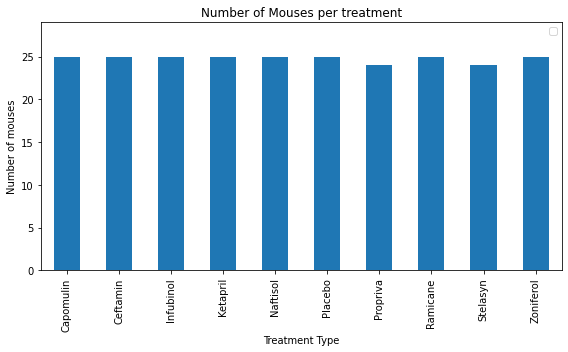

In [252]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mouses_per_treatment= clean_mouse_study_df.groupby("Drug Regimen").nunique()
ax =mouses_per_treatment.plot(kind="bar",y="Mouse ID",figsize =(8,5),title=("Number of Mouses per treatment"),ylim=(0,29))
ax.set(xlabel = "Treatment Type",ylabel="Number of mouses")
plt.legend("")
plt.tight_layout()
plt.show()

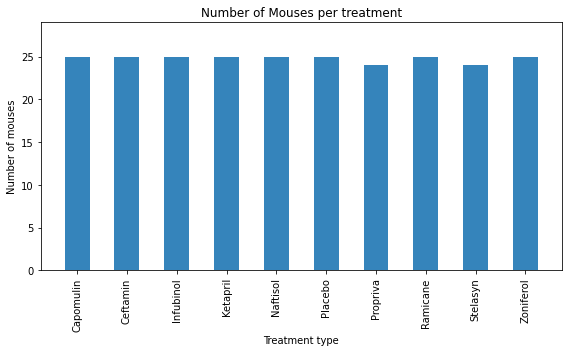

In [253]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
mouses_per_treatment= clean_mouse_study_df.groupby("Drug Regimen").nunique().reset_index()
fig = plt.figure()
fig.set_size_inches(8,5)
plt.bar(mouses_per_treatment["Drug Regimen"],mouses_per_treatment["Mouse ID"],alpha = 0.9,width=0.5)
plt.xticks(rotation = "vertical")
plt.xlabel("Treatment type")
plt.ylabel("Number of mouses")
plt.title("Number of Mouses per treatment")
plt.ylim(0,29)
plt.tight_layout()
plt.show()


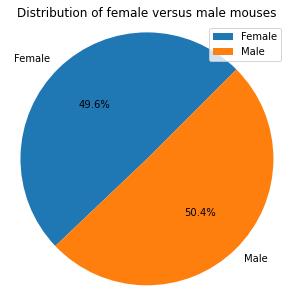

In [254]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count= clean_mouse_study_df.groupby("Sex").nunique()
ax =gender_count.plot(kind="pie",y='Mouse ID',title="Distribution of female versus male mouses",figsize=(5,5),autopct='%1.1f%%',startangle =45)
ax.set_ylabel('')
plt.axis('equal')
plt.legend(loc='best')
plt.show()


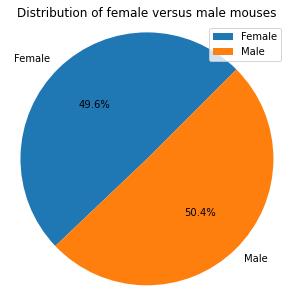

In [255]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_count= clean_mouse_study_df.groupby("Sex").nunique().reset_index()
fig = plt.figure()
fig.set_size_inches(5,5)
plt.title("Distribution of female versus male mouses")
plt.pie(gender_count["Mouse ID"],labels=gender_count["Sex"],autopct="%1.1f%%",startangle=45)
plt.legend(loc = "best")
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [256]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
four_treatments = ["Capomulin","Ramicane","Infubinol","Ceftamin"]
#four_treatments = clean_mouse_study_df["Drug Regimen"].unique()
# Start by getting the last (greatest) timepoint for each mouse
last_time_point=clean_mouse_study_df.groupby("Mouse ID").max().reset_index()
last_time_point =last_time_point[["Mouse ID","Timepoint"]]
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_volume_last_timepoint = last_time_point.merge(clean_mouse_study_df,on=["Mouse ID","Timepoint"],how="left")
tumor_volume_last_timepoint = tumor_volume_last_timepoint.loc[tumor_volume_last_timepoint["Drug Regimen"].isin(four_treatments),:]
tumor_volume_last_timepoint

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
238,y769,45,Ceftamin,Female,6,27,68.594745,4
239,y793,45,Capomulin,Male,17,17,31.896238,2
240,y865,45,Ceftamin,Male,23,26,64.729837,3
244,z578,45,Ramicane,Male,11,16,30.638696,0


In [257]:
# Put treatments into a list for for loop (and later for plot labels)
# this data is in four_treatments list in the cell above

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []
drug_regiment_outliers=[]
j=0
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for i in four_treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol_data.append(tumor_volume_last_timepoint.loc[tumor_volume_last_timepoint["Drug Regimen"]==i,"Tumor Volume (mm3)"])
    # add subset 
    quantiles = tumor_vol_data[j].quantile([0.25,0.5,0.75])
    lowerqt = quantiles[0.25]
    upperqt = quantiles[0.75]
    iqr = upperqt - lowerqt
    lowerbound = lowerqt - (1.5*iqr)
    upperbound = upperqt + (1.5*iqr)
    # Determine outliers using upper and lower bounds
    outliers = [x for x in tumor_vol_data[j] if ((x<lowerbound)|(x>upperbound))]
    drug_regiment_outliers.append(outliers)
    print(f"Potential Outliers Tumor Volumes of {four_treatments[j]} Drug is: {drug_regiment_outliers[j]}")
    j+=1    

     

Potential Outliers Tumor Volumes of Capomulin Drug is: []
Potential Outliers Tumor Volumes of Ramicane Drug is: []
Potential Outliers Tumor Volumes of Infubinol Drug is: [36.3213458]
Potential Outliers Tumor Volumes of Ceftamin Drug is: []


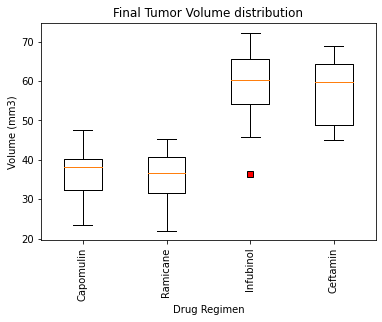

In [258]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
outliers_format = dict(markerfacecolor='r', marker='s')
fig1 , ax1 = plt.subplots()
ax1.boxplot (tumor_vol_data,flierprops=outliers_format)
ax1.set_title("Final Tumor Volume distribution")
ax1.set_ylabel("Volume (mm3)")
ax1.set_xlabel("Drug Regimen")
ax1.set_xticklabels(four_treatments,rotation = "vertical")
plt.show()

## Line and Scatter Plots

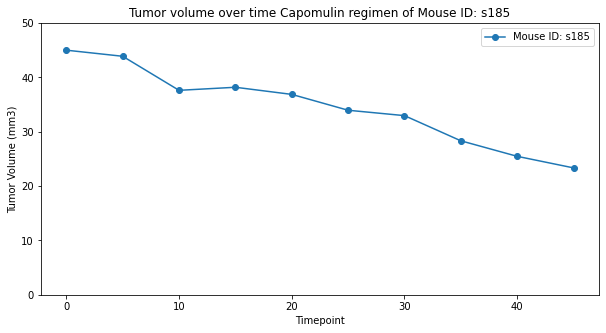

In [259]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Capomulin_df = clean_mouse_study_df.loc[clean_mouse_study_df["Drug Regimen"]=="Capomulin",:]
mouse_list_Capomulin = Capomulin_df["Mouse ID"].unique()
mouse_position = 0
one_mouse_data_Capomulin = Capomulin_df.loc[Capomulin_df["Mouse ID"]==mouse_list_Capomulin[mouse_position],["Timepoint","Tumor Volume (mm3)"]]
one_mouse_data_Capomulin.set_index("Timepoint",inplace=True)
ax = one_mouse_data_Capomulin.plot(kind="line", figsize =(10,5), 
                                   title = "Tumor volume over time Capomulin regimen of Mouse ID: " + mouse_list_Capomulin[mouse_position],
                                   marker="o")
ax.set_ylabel("Tumor Volume (mm3)")
ax.legend(["Mouse ID: "+mouse_list_Capomulin[mouse_position]],loc="best")
ax.set_ylim(0,50)
plt.show()

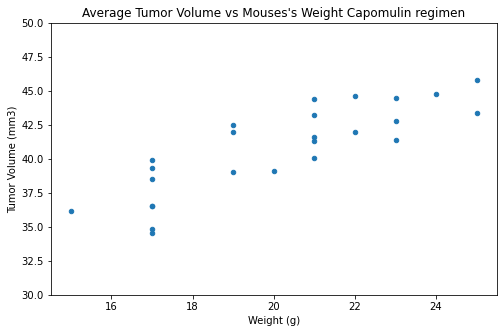

In [260]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
average_Tumor_Volume_Capomulin_df = Capomulin_df.groupby("Mouse ID").mean()
average_Tumor_Volume_Capomulin_df.plot(kind ="scatter",x="Weight (g)",y="Tumor Volume (mm3)",
                                       title="Average Tumor Volume vs Mouses's Weight Capomulin regimen",figsize = (8,5))
plt.ylim(30,50)
plt.show()

## Correlation and Regression

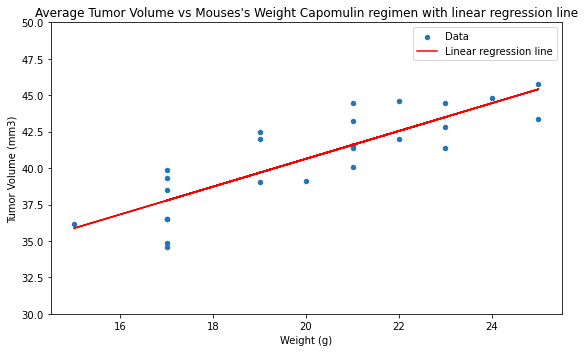

In [261]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(average_Tumor_Volume_Capomulin_df["Weight (g)"],average_Tumor_Volume_Capomulin_df["Tumor Volume (mm3)"])
regress_value = slope * average_Tumor_Volume_Capomulin_df["Weight (g)"] + intercept

average_Tumor_Volume_Capomulin_df.plot(kind ="scatter",x="Weight (g)",y="Tumor Volume (mm3)",
                                       title="Average Tumor Volume vs Mouses's Weight Capomulin regimen with linear regression line",figsize = (8,5))
plt.plot(average_Tumor_Volume_Capomulin_df["Weight (g)"],regress_value,color="r")
plt.legend(["Data","Linear regression line"],loc="best")
plt.ylim(30,50)
plt.tight_layout()
plt.show()

In [262]:
correlation = st.pearsonr(average_Tumor_Volume_Capomulin_df["Weight (g)"],average_Tumor_Volume_Capomulin_df["Tumor Volume (mm3)"])
print(f"Correlation coefficient between Mouses weight and Average Tumor Volume for Capomulin regimen is: {round(correlation[0],2)}")

Correlation coefficient between Mouses weight and Average Tumor Volume for Capomulin regimen is: 0.84
